# CI280 - Final Project - Part B
# Data Preparation, Sort, Groupby and Plot

## Name: Shamaila Afreen


In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 8))

In [13]:
df = pd.read_csv('covid-data.csv')

In [14]:
# limiting the display rows
pd.set_option('display.max_rows', 5)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60096,ZWE,Africa,Zimbabwe,2020-11-30,9950.0,128.0,91.714,276.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60097,ZWE,Africa,Zimbabwe,2020-12-01,10129.0,179.0,104.429,277.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [15]:
df = df[ (df['location'] != 'World') ]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60096,ZWE,Africa,Zimbabwe,2020-11-30,9950.0,128.0,91.714,276.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60097,ZWE,Africa,Zimbabwe,2020-12-01,10129.0,179.0,104.429,277.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [16]:
# Show number of records 
import random
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')

print("Number of records:" ,len(df))

Shamaila Afreen, 21500 7798
------------------------------
Number of records: 59783


## C) Handing Missing Data and Ploting (20 pts)

### use isnull() vs. notnull()
### use dropna
### use replacena

In [17]:
# show last five rows
df.tail(5)     

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
60093,ZWE,Africa,Zimbabwe,2020-11-27,9714.0,91.0,84.857,275.0,1.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60094,ZWE,Africa,Zimbabwe,2020-11-28,9822.0,108.0,92.857,275.0,0.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60095,ZWE,Africa,Zimbabwe,2020-11-29,9822.0,0.0,86.000,275.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60096,ZWE,Africa,Zimbabwe,2020-11-30,9950.0,128.0,91.714,276.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60097,ZWE,Africa,Zimbabwe,2020-12-01,10129.0,179.0,104.429,277.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [18]:
# show the number of rows and columns of dataframe 
df.shape
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

# 1) Show the number records of miss data for continent ( 2 pts)
#    Show the the last five those records 

print('The number records missing data for continent')
print(len(df[df.continent.isnull()]))
df[df.continent.isnull()].tail()





Shamaila Afreen, 21500  3877
------------------------------
The number records missing data for continent
314


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24558,NaN,NaN,International,2020-11-27,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24559,NaN,NaN,International,2020-11-28,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24560,NaN,NaN,International,2020-11-29,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24561,NaN,NaN,International,2020-11-30,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24562,NaN,NaN,International,2020-12-01,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('-------------------')


# 2-3) Show the number records of miss data for continent and iso_code (2 pts)
#    Show the the last five those records ( 2 pts)

print('The number records missing data for continent and iso_code')
print(len(df[df.continent.isnull() & df.iso_code.isnull()]))
df[df.continent.isnull() & df.iso_code.isnull()].tail()




Shamaila Afreen, 21500  9658
-------------------
The number records missing data for continent and iso_code
314


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24558,NaN,NaN,International,2020-11-27,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24559,NaN,NaN,International,2020-11-28,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24560,NaN,NaN,International,2020-11-29,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24561,NaN,NaN,International,2020-11-30,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24562,NaN,NaN,International,2020-12-01,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')


# 4-5) For the records for United Kingdom, which columns has missing data (4 pts)
res = df[df['location']=='United Kingdom']
res

col_names = res.columns
col_names

print('The following columns are missing data for United Kingdom')

print('Column name \t\t\t\tMissing Data')
print('------------------------------------------------')
for name in col_names:
    num = len(res[res[name].isnull()])
    if num > 0:
        print('{0: <40}'.format(name), num)



Shamaila Afreen, 21500 5168
------------------------------
The following columns are missing data for United Kingdom
Column name 				Missing Data
------------------------------------------------
total_cases                              8
new_cases_smoothed                       5
total_deaths                             43
new_deaths_smoothed                      5
total_cases_per_million                  8
new_cases_smoothed_per_million           5
total_deaths_per_million                 43
new_deaths_smoothed_per_million          5
reproduction_rate                        51
icu_patients                             79
icu_patients_per_million                 79
hosp_patients                            73
hosp_patients_per_million                73
weekly_icu_admissions                    314
weekly_icu_admissions_per_million        314
weekly_hosp_admissions                   275
weekly_hosp_admissions_per_million       275
total_tests                              69
new_tests      

In [21]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')


#df.columns

df.shape
# .dropna() vs. . dropna(how='all')

# 6) Show the result after droping rows which have at least one NaN data in the dataset ()  (2 pts)
cleaned = df.dropna()

print('After using .dropn(), total records: ')
print(len(cleaned))






Shamaila Afreen, 21500 6457
------------------------------
After using .dropn(), total records: 
0


In [22]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

# 7) Show the result after after droping rows which all data is NaN in the dataset ()  (2 pts)
res = df[df['location']=='United Kingdom']
res
cleaned = res.dropna(how='all')

print("After using .dropna(how='all'), total records:")
print(len(cleaned))




Shamaila Afreen, 21500  1485
------------------------------
After using .dropna(how='all'), total records:
314


In [23]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

print(df.shape)
print('Original row number:', len(df))

# 8) Show the result after dropping the rows which continent or iso data is missing in the dataset
#    How many rows are dropped. (2 pts)

cleaned_data = df[df.continent.notnull() & df.iso_code.notnull()]
bad_data = df[df.continent.isnull() | df.iso_code.isnull()]
print('After droping all missing data of continent or iso in the dataset')
print('New dataset included record number:', len(cleaned_data))
print('The number of rows droped:', len(bad_data))





Shamaila Afreen, 21500  7497
------------------------------
(59783, 50)
Original row number: 59783
After droping all missing data of continent or iso in the dataset
New dataset included record number: 59469
The number of rows droped: 314


In [24]:
res = df[df['location']=='United Kingdom']
res[['location','handwashing_facilities']]

,location,handwashing_facilities
56014,United Kingdom,NaN
56015,United Kingdom,NaN
...,...,...
56326,United Kingdom,NaN
56327,United Kingdom,NaN


In [25]:

# 9) Show United Kingdom's handwashing_facilities information
#    Show the average of handwashing_facilities of worldwide level

import random
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')

#print(df['handwashing_facilities'].describe())


print("Handwashing_facilities values are missing in United Kingdom")
res = df[df['location']=='United Kingdom']
print(len(res))
data = res[res['handwashing_facilities'].isnull()] [['location','date','handwashing_facilities']]
print(data)

avg = df['handwashing_facilities'].mean()
print('The average of handwashing facilities worldwide:', format(avg, '.0f'))






Shamaila Afreen, 21500 4899
------------------------------
Handwashing_facilities values are missing in United Kingdom
314
             location        date  handwashing_facilities
56014  United Kingdom  2020-01-23                     NaN
56015  United Kingdom  2020-01-24                     NaN
...               ...         ...                     ...
56326  United Kingdom  2020-11-30                     NaN
56327  United Kingdom  2020-12-01                     NaN

[314 rows x 3 columns]
The average of handwashing facilities worldwide: 50


In [26]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

import math

# 10) Replace handwashing_facilities in United Kingdom as the average of worldwide level (2 pts)

res = df[df['location']=='United Kingdom']
avg = df['handwashing_facilities'].mean()
avg = math.floor(avg)

print('Now handwashing facilities values are replaced by the average of worldwide level')
data

res['handwashing_facilities'].fillna(avg, inplace=True)
res[['location', 'date','handwashing_facilities']]





Shamaila Afreen, 21500  3116
------------------------------
Now handwashing facilities values are replaced by the average of worldwide level


C:\Users\shama\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,location,date,handwashing_facilities
56014,United Kingdom,2020-01-23,50.0
56015,United Kingdom,2020-01-24,50.0
...,...,...,...
56326,United Kingdom,2020-11-30,50.0
56327,United Kingdom,2020-12-01,50.0


# D) Sorting, Grouping and Plotting (30 points) 

## df.sort_values(by=['a','b'], ascending = True)
## df.sort_index()
## df.groupby( )

In [27]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')
import matplotlib.pyplot as plt

# 1)  (3 pts) Find the top 10 countries which have the most covid cases

# Group all cases by location , become series
cases = df.groupby(df.location).new_cases.sum()
cases = cases.sort_values(ascending = False)
cases

res = cases.head(10)
countries = res.index

print('Ten countries which have the most covid cases:')
print('Country              Covid cases')
print('---------------------------------------------')
for country in countries:
    print('{0: <20}'.format(country), '\t', format(res[country],'.0f'))








Shamaila Afreen, 21500 6890
------------------------------
Ten countries which have the most covid cases:
Country              Covid cases
---------------------------------------------
United States        	 13721303
India                	 9499413
Brazil               	 6386787
Russia               	 2302062
France               	 2275429
Spain                	 1656444
United Kingdom       	 1647230
Italy                	 1620901
Argentina            	 1432570
Colombia             	 1324792


Shamaila Afreen, 21500  1566
------------------------------
Index(['United States', 'India', 'Brazil', 'Russia', 'France', 'Spain',
       'United Kingdom', 'Italy', 'Argentina', 'Colombia'],
      dtype='object', name='location')
[13721303.  9499413.  6386787.  2302062.  2275429.  1656444.  1647230.
  1620901.  1432570.  1324792.]


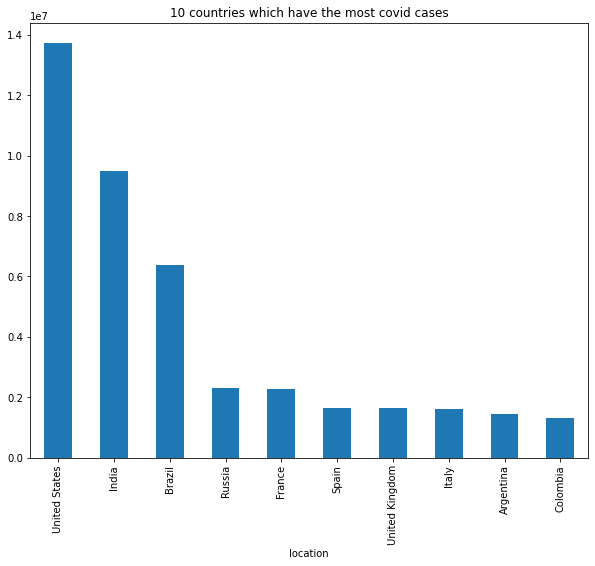

In [28]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')


# 2) Use bar chart to show the top 10 countries which have the most covid cases. (3 pts)
res = cases.head(10)
res

print(res.index)
print(res.values)

res.plot(kind='bar', title='10 countries which have the most covid cases')



Shamaila Afreen, 21500  506
------------------------------
10 days which have the most Covid Cases
Date                     Covid Cases
---------------------------------------------------
2020-11-06 	 642162
2020-11-11 	 645209
2020-11-12 	 647434
2020-11-13 	 648898
2020-11-17 	 608125
2020-11-18 	 623938
2020-11-19 	 650769
2020-11-20 	 666304
2020-11-25 	 633149
2020-11-27 	 672046


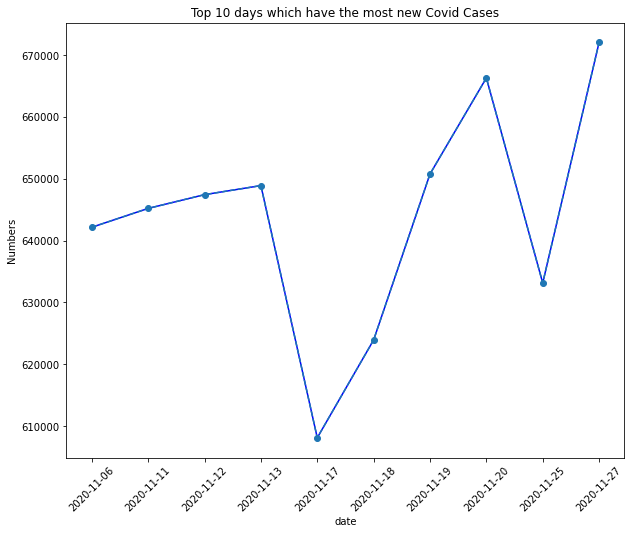

In [29]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

# (3  pts)

# 3) Show worldwide, which ten day has the most new cases? 

#    Use line chart to show the top 10 days which have the most new covid cases 

cases = df.groupby(df.date).new_cases.sum()
cases = cases.sort_values(ascending = False)

res = cases.head(10)
res = res.sort_index()

days = res.index



print ('10 days which have the most Covid Cases')
print ('Date                     Covid Cases')
print ('---------------------------------------------------')

for day in days:
    print(day, '\t', format (res[day], '.0f'))



# Draw bar chart
plt.title('Top 10 days which have the most new Covid Cases')
plt.xlabel('Date')
plt.ylabel('Numbers')

plt.plot(res.index,res.values, color ='b')

res.plot (kind='line', rot = 45, linestyle = 'dashed' , marker = 'o')




Shamaila Afreen, 21500  3290
------------------------------
On 2020-11-30
10 countries which have the most covid cases on 2020-11-10
Country               Covid cases
----------------------------------------------------
Brazil               		 21138
Germany              		 14221
India                		 31118
Iran                 		 13321
Italy                		 16376
Russia               		 26046
Spain                		 19979
Turkey               		 31219
United Kingdom       		 12428
United States        		 157901


<BarContainer object of 10 artists>

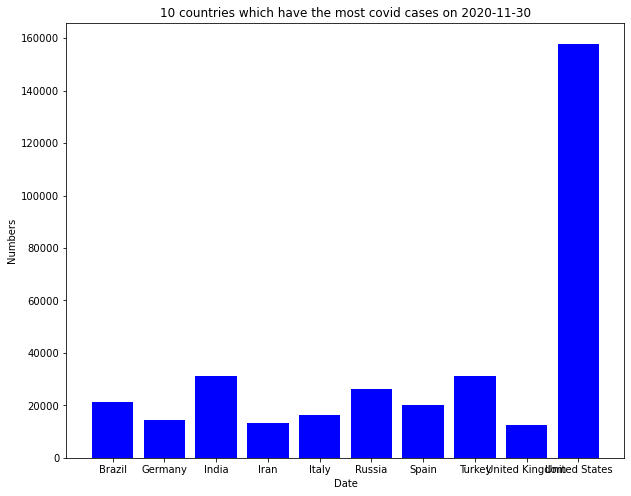

In [32]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

# (3  pts)

# 4) On 2020-11-30, which ten countries has the most new cases? 

#    Use bar chart to show the top 10 location which have the most new covid cases 
res = df[df.date=='2020-11-30']


#Sorting cases
cases = res.sort_values(by='new_cases', ascending = False)


res = cases.head(10)[['location','new_cases']]
res = res.sort_index()


#Display dataframes
print("On 2020-11-30")
print("10 countries which have the most covid cases on 2020-11-10")
print("Country               Covid cases")
print('----------------------------------------------------')


for i in res.index:
    country = res['location'][i]
    new_cases = res['new_cases'][i]
    print('{0: <20}'.format(country), '\t\t', format(new_cases, '.0f'))
    
    
      
# Draw bar chart
plt.title("10 countries which have the most covid cases on 2020-11-30")
plt.xlabel("Date")
plt.ylabel("Numbers")

plt.bar(res['location'],res['new_cases'], color='b')


  

Shamaila Afreen, 21500 9711
------------------------------

In the past seven days the new cases in United Kingdom
Date             Covid cases
------------------------------------------------
2020-11-25 	 18261
2020-11-26 	 17557
2020-11-27 	 14821
2020-11-28 	 15891
2020-11-29 	 12164
2020-11-30 	 12428
2020-12-01 	 13497


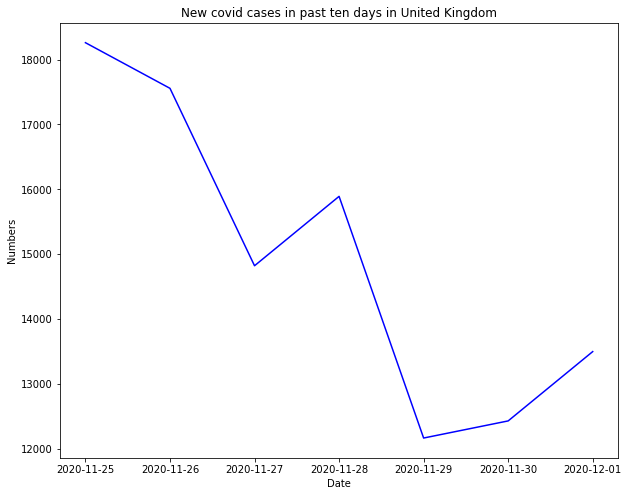

In [33]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')

# (3  pts)

#  5)  Show last seven days, the new cases in United Kingdom (Chose one country),
#      Plot a line chart

cases = df[df.location=='United Kingdom'].sort_values(by='date', ascending=True)
cases
res = cases[['date','new_cases']].tail(7)

print('\nIn the past seven days the new cases in United Kingdom')
print('Date             Covid cases')
print('------------------------------------------------')

dates = res['date']
for i in res.index:
    print(res['date'][i], '\t', format(res['new_cases'][i], '.0f'))

plt.title('New covid cases in past ten days in United Kingdom')
plt.xlabel('Date')
plt.ylabel('Numbers')

plt.plot(res['date'],res['new_cases'],color='b')



Shamaila Afreen, 21500 4958
------------------------------
Total covid new cases by continent
----------------------------------
Europe               	 17535114
Asia                 	 16913614
North America        	 16007978
South America        	 11201967
Africa               	 2184962
Oceania              	 30716


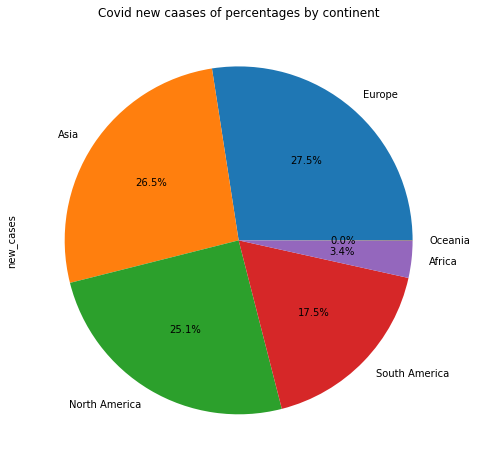

In [34]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')


# 6-7) Group by contient, show total of new covid cases for each contient and sorted by total number
#    Plot the result by pie chart (3 pts)
df
res = df.groupby(df.continent).new_cases.sum().sort_values(ascending=False)

print('Total covid new cases by continent')
print('----------------------------------')
names = res.index
for name in names:
    print('{0: <20}'.format(name), '\t', format(res[name], '.0f'))

res.plot(kind='pie', title='Covid new caases of percentages by continent', autopct='%1.1f%%')








In [35]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

# 8) Show the top 10 countries which have the most population  (3 pts)
df

res = df[df.date=='2020-11-30'][['location', 'population']].sort_values(by = 'population', ascending = False)
res = res.head(10)
res.index

print('Top 10 countries which have the most POPULATION')
for i in res.index:
    print('{0: <20}'.format(res['location'][i]), format(res['population'][i], '.0f'))

res2 = res.set_index('location')








Shamaila Afreen, 21500  31
------------------------------
Top 10 countries which have the most POPULATION
China                1439323774
India                1380004385
United States        331002647
Indonesia            273523621
Pakistan             220892331
Brazil               212559409
Nigeria              206139587
Bangladesh           164689383
Russia               145934460
Mexico               128932753


Shamaila Afreen, 21500 9429
------------------------------

The world population 7746825445.0

Population by continent
------------------------------
Asia                 	 1448051847967
Africa               	 420579111194
Europe               	 234925536058
North America        	 187693868493
South America        	 135163688598
Oceania              	 12942705398


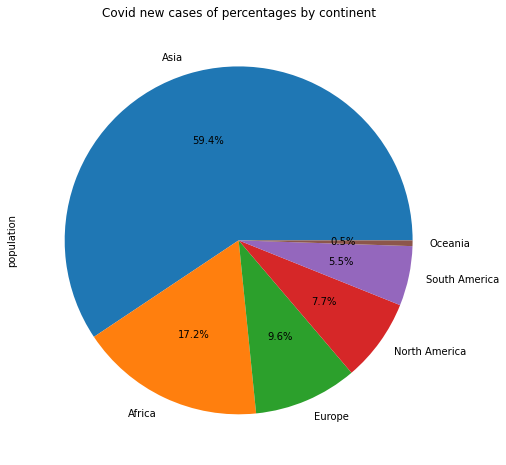

In [38]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')
print()
# 9-10) Show the world poplation
#      Show the  population by each continent and show it as pie chart (6 pts)
data = df[df.date=='2020-11-30']
pop_sum = data['population'].sum()
print('The world population', pop_sum)

data = df[df.date=='2020-11-30'][['continent', 'location', 'date', 'population']]

res = df.groupby([df.continent]).population.sum().sort_values(ascending = False)
print()
print('Population by continent')
print('------------------------------')
names = res.index
for name in names:
    print('{0: <20}'.format(name), '\t', format(res[name], '.0f'))

res.plot(kind='pie', title='Covid new cases of percentages by continent', autopct='%1.1f%%')

